In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout, Bidirectional, LSTM , Embedding,Dense, Concatenate
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
data = pd.read_csv('data/data.csv')[['close']]

In [149]:
data = data[2900:]

In [66]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [108]:
def get_sample(data, length, temporal_horizon):

    temporal_horizon = temporal_horizon - 1
    last_possible = len(data) - temporal_horizon - length
    random_start = np.random.randint(0, last_possible)
    X_sample = data[random_start: random_start+length]
    #print(type(X_sample))
    #X_sample = [[_] for _ in X_sample.values]
    
    
    y_sample = data[random_start+length:random_start+length+temporal_horizon + 1]
        
    return X_sample, y_sample

def get_X_y(data, temporal_horizon, length_of_sequences):
    X, y = [], []
    for len_ in length_of_sequences:
        xi, yi = get_sample(data, len_, temporal_horizon)
        X.append(xi)
        y.append(yi)

    y = np.array(y)
    
    return X, y

def generate_data(data, n_days, length_of_sequences):
    X, y = get_X_y(data, n_days, length_of_sequences)
    
    #X = np.array(X)
    
    n_train = int(0.8*len(X))
    
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    
    
    return X_train, X_test, y_train, y_test

In [150]:
n_days = 10
length_of_sequences = [60 for x in range(1500)]

X_train, X_test, y_train, y_test = generate_data(data, n_days, length_of_sequences)

In [82]:
def init_model() :
    model = Sequential()               
    model.add(layers.LSTM(150,activation = 'tanh',input_shape=(60, 1),return_sequences = True))
    model.add(Dropout(0.5))  
    model.add(Bidirectional(LSTM(120, activation = 'tanh',return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(100,activation = 'tanh',return_sequences = True)))
    model.add(Dropout(0.5))
    model.add(layers.LSTM(80,activation = 'tanh'))
    model.add(layers.Dense(60,activation = 'relu'))     
    model.add(layers.Dense(10,activation = 'linear'))

    model.compile(loss = 'mse', optimizer = 'rmsprop',metrics = ['mae'])

    return model

In [151]:
from tensorflow.keras.callbacks import EarlyStopping
model = init_model()
es = EarlyStopping(monitor = 'val_loss',mode = 'min' , verbose = 1, patience = 20, restore_best_weights = True)
history = model.fit(np.array(X_train), y_train,
                    validation_split = 0.3,
                   callbacks = [es], 
                   epochs = 1000, 
                   batch_size = 32,
                   shuffle = True)

Epoch 1/1000
27/27 [==============================] - 5s 186ms/step - loss: 0.0392 - mae: 0.1356 - val_loss: 0.0055 - val_mae: 0.0624
Epoch 2/1000
27/27 [==============================] - 4s 133ms/step - loss: 0.0095 - mae: 0.0757 - val_loss: 0.0228 - val_mae: 0.1396
Epoch 3/1000
27/27 [==============================] - 4s 131ms/step - loss: 0.0095 - mae: 0.0764 - val_loss: 0.0035 - val_mae: 0.0456
Epoch 4/1000
27/27 [==============================] - 4s 130ms/step - loss: 0.0074 - mae: 0.0675 - val_loss: 0.0183 - val_mae: 0.1195
Epoch 5/1000
27/27 [==============================] - 4s 130ms/step - loss: 0.0061 - mae: 0.0613 - val_loss: 0.0028 - val_mae: 0.0394
Epoch 6/1000
27/27 [==============================] - 3s 129ms/step - loss: 0.0057 - mae: 0.0591 - val_loss: 0.0028 - val_mae: 0.0377
Epoch 7/1000
27/27 [==============================] - 4s 132ms/step - loss: 0.0045 - mae: 0.0522 - val_loss: 0.0063 - val_mae: 0.0688
Epoch 8/1000
27/27 [==============================] - 3s 129ms

Epoch 62/1000
27/27 [==============================] - 3s 129ms/step - loss: 0.0017 - mae: 0.0294 - val_loss: 0.0012 - val_mae: 0.0251
Epoch 63/1000
27/27 [==============================] - 4s 130ms/step - loss: 0.0018 - mae: 0.0314 - val_loss: 0.0016 - val_mae: 0.0288
Epoch 64/1000
27/27 [==============================] - 3s 129ms/step - loss: 0.0018 - mae: 0.0314 - val_loss: 0.0015 - val_mae: 0.0269
Epoch 65/1000
27/27 [==============================] - 4s 130ms/step - loss: 0.0017 - mae: 0.0297 - val_loss: 0.0014 - val_mae: 0.0263
Epoch 66/1000
27/27 [==============================] - 3s 129ms/step - loss: 0.0017 - mae: 0.0300 - val_loss: 0.0014 - val_mae: 0.0257
Epoch 67/1000
27/27 [==============================] - 4s 133ms/step - loss: 0.0018 - mae: 0.0308 - val_loss: 0.0011 - val_mae: 0.0239
Epoch 68/1000
27/27 [==============================] - 4s 137ms/step - loss: 0.0021 - mae: 0.0303 - val_loss: 0.0018 - val_mae: 0.0331
Epoch 69/1000
27/27 [==============================] - 

27/27 [==============================] - 4s 131ms/step - loss: 0.0010 - mae: 0.0243 - val_loss: 7.9587e-04 - val_mae: 0.0204
Epoch 123/1000
27/27 [==============================] - 4s 133ms/step - loss: 9.7043e-04 - mae: 0.0232 - val_loss: 8.1719e-04 - val_mae: 0.0214
Epoch 124/1000
27/27 [==============================] - 4s 135ms/step - loss: 9.8076e-04 - mae: 0.0233 - val_loss: 0.0019 - val_mae: 0.0361
Epoch 125/1000
27/27 [==============================] - 4s 142ms/step - loss: 9.2710e-04 - mae: 0.0224 - val_loss: 0.0011 - val_mae: 0.0248
Epoch 126/1000
27/27 [==============================] - 4s 138ms/step - loss: 0.0010 - mae: 0.0236 - val_loss: 8.0966e-04 - val_mae: 0.0213
Epoch 127/1000
27/27 [==============================] - 4s 130ms/step - loss: 8.0049e-04 - mae: 0.0210 - val_loss: 0.0020 - val_mae: 0.0342
Epoch 128/1000
27/27 [==============================] - 4s 133ms/step - loss: 0.0011 - mae: 0.0237 - val_loss: 0.0013 - val_mae: 0.0265
Epoch 129/1000
27/27 [=============

27/27 [==============================] - 4s 138ms/step - loss: 4.7444e-04 - mae: 0.0162 - val_loss: 4.2487e-04 - val_mae: 0.0153
Epoch 180/1000
27/27 [==============================] - 4s 135ms/step - loss: 5.2117e-04 - mae: 0.0171 - val_loss: 6.7924e-04 - val_mae: 0.0196
Epoch 181/1000
27/27 [==============================] - 4s 137ms/step - loss: 5.1723e-04 - mae: 0.0170 - val_loss: 0.0014 - val_mae: 0.0269
Epoch 182/1000
27/27 [==============================] - 4s 147ms/step - loss: 5.0290e-04 - mae: 0.0165 - val_loss: 6.5166e-04 - val_mae: 0.0182
Epoch 183/1000
27/27 [==============================] - 4s 134ms/step - loss: 5.0644e-04 - mae: 0.0168 - val_loss: 3.4383e-04 - val_mae: 0.0137
Epoch 184/1000
27/27 [==============================] - 4s 134ms/step - loss: 4.4907e-04 - mae: 0.0155 - val_loss: 0.0011 - val_mae: 0.0233
Epoch 185/1000
27/27 [==============================] - 4s 131ms/step - loss: 6.0584e-04 - mae: 0.0172 - val_loss: 2.9089e-04 - val_mae: 0.0128
Epoch 186/1000


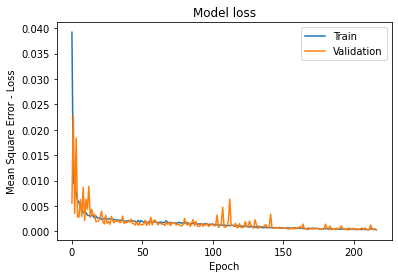

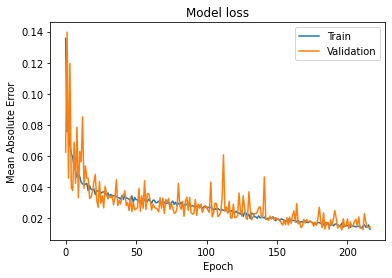

In [152]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Mean Square Error - Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model loss')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
plot_loss(history)

In [159]:
x = 1

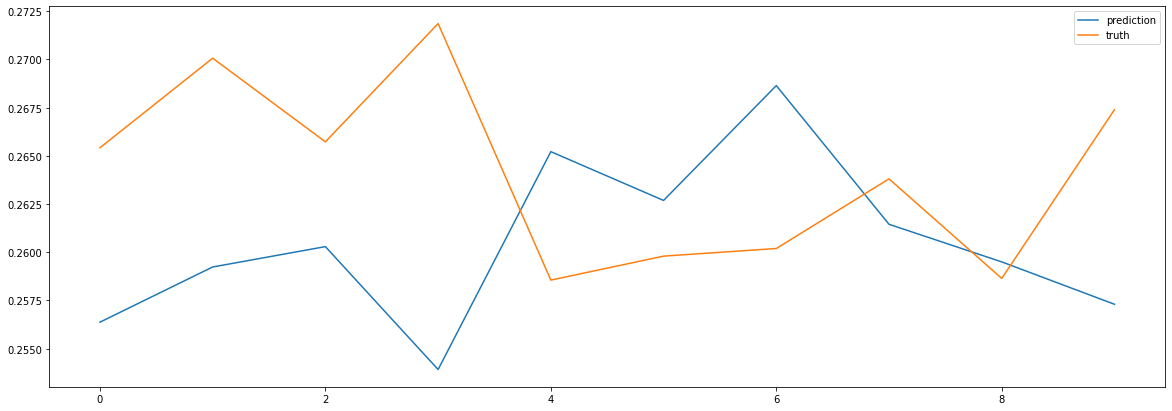

In [160]:
#X_test[x].shape = (1, X_test[x].shape[0] ,X_test[x].shape[1] )
plt.figure(figsize = (20,7))
plt.plot(model.predict(X_test[x])[0], label= 'prediction')
plt.plot(y_test[x], label = 'truth')
plt.legend()

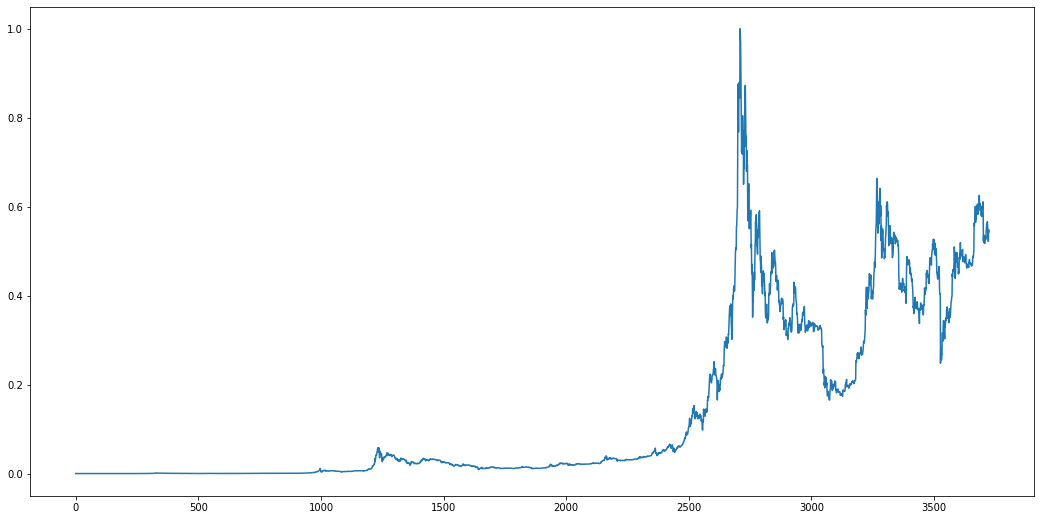

In [146]:
plt.figure(figsize = (18, 9))
plt.plot(data)

300